# Kaggle Playground - Season 4 Episode 7
## Binary Classification of Insurance Cross Selling

Competion link - https://www.kaggle.com/competitions/playground-series-s4e7

### Steps
- Import the necessary libraries, packages and modules
- Unzip the zipped files
- Read the datsets as data framers

### Understand the problem

The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

In [1]:
# Import the necessary libraries, packages and modules

import warnings
warnings.filterwarnings('ignore')

import dtale    # Use of a web progrm to analysis the data deeply
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import statsmodels.api as sm
import zipfile

from imblearn.over_sampling import RandomOverSampler
#from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

sns.set()
%matplotlib inline

In [2]:
# Load the data into a pandas DataFrame

# train_path = r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\18_Binary Classification of Insurance Cross Selling\train.csv.zip"
# test_path = r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\18_Binary Classification of Insurance Cross Selling\test.csv.zip"

# zip_train = zipfile.ZipFile(file = train_path, mode = 'r')
# zip_test = zipfile.ZipFile(file = test_path, mode = 'r')

# zip_train.extractall('./')
# zip_test.extractall('./')

# zip_train.close
# zip_test.close

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


### Identify the target variable and features

- Response is the target variable
- It depends if the user has responded to the insurance call or not

### Remove duplicate rows

- Checked the sum of duplicated rows in train and test datasets
- No dupllicated rows in train dataframe


In [5]:
train_df.duplicated().sum()

0

In [6]:
test_df.duplicated().sum()

0

### Handling missing values
- Checked the missing values in column
- No missing values in train and test dataframes

In [7]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### Checking for incorrect datatypes

- There are no incorrect datatypes 
- The type of columns in both train and test are some
- Below are the observations
     0.   id                   - int64      - insignificant
     1.   Gender               - object     - categorical - change to numeric
     2.   Age                  - int64      - categorical - numeric
     3.   Driving_License      - int64      - categorical - numeric
     4.   Region_Code          - float64    - categorical - numeric
     5.   Previously_Insured   - int64      - categorical - numeric
     6.   Vehicle_Age          - object     - categorical - change to numeric
     7.   Vehicle_Damage       - object     - categorical - change to numeric
     8.   Annual_Premium       - float64    - numeric
     9.   Policy_Sales_Channel - float64    - not sure
     10.  Vintage              - int64      - not sure

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [11]:
column_names = train_df.columns.tolist()

for i in column_names:
    print(i, train_df[i].nunique(), 'unique values')

id 11504798 unique values
Gender 2 unique values
Age 66 unique values
Driving_License 2 unique values
Region_Code 54 unique values
Previously_Insured 2 unique values
Vehicle_Age 3 unique values
Vehicle_Damage 2 unique values
Annual_Premium 51728 unique values
Policy_Sales_Channel 152 unique values
Vintage 290 unique values
Response 2 unique values


### Encoding categorical variables

- Columns needing encoding
    - Gender - Label encoder
    - Vehicle_Age - Mapped encoder
    - Vehicle_Damage - Label encoder
- All columns are now numeric, we can proceed with building the models

In [12]:
# Proceeding with encoding
# Label encoder on gender column

train_df['Gender'] = train_df['Gender'].astype('category')
train_df['Gender'] = train_df['Gender'].cat.codes

test_df['Gender'] = test_df['Gender'].astype('category')
test_df['Gender'] = test_df['Gender'].cat.codes

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [13]:
unique_veh_age = train_df['Vehicle_Age'].unique
print(unique_veh_age)

<bound method Series.unique of 0            1-2 Year
1           > 2 Years
2            < 1 Year
3            1-2 Year
4            1-2 Year
              ...    
11504793     1-2 Year
11504794     < 1 Year
11504795     < 1 Year
11504796     1-2 Year
11504797     < 1 Year
Name: Vehicle_Age, Length: 11504798, dtype: object>


In [14]:
# Define the mapping for encoding

veh_age_mapping = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

# Encode the 'Vehicle_Age' column

train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(veh_age_mapping)
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map(veh_age_mapping)

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1,Yes,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,Yes,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,0,No,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1,Yes,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1,No,31951.0,152.0,294,0


In [15]:
# Encoding 'Vehicle_Damage' column - using label encoding

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].astype('category')
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].cat.codes

test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].astype('category')
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].cat.codes

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                int8   
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           int64  
 7   Vehicle_Damage        int8   
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(7), int8(2)
memory usage: 899.7 MB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                int8   
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           int64  
 7   Vehicle_Damage        int8   
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(6), int8(2)
memory usage: 541.3 MB


## Exploratory data analysis

### Building correlation matrix to determine the significant features
- There are no features with very high correlation
- Only a few features show mild correlation
- There is not much significant classification with any of the variables.

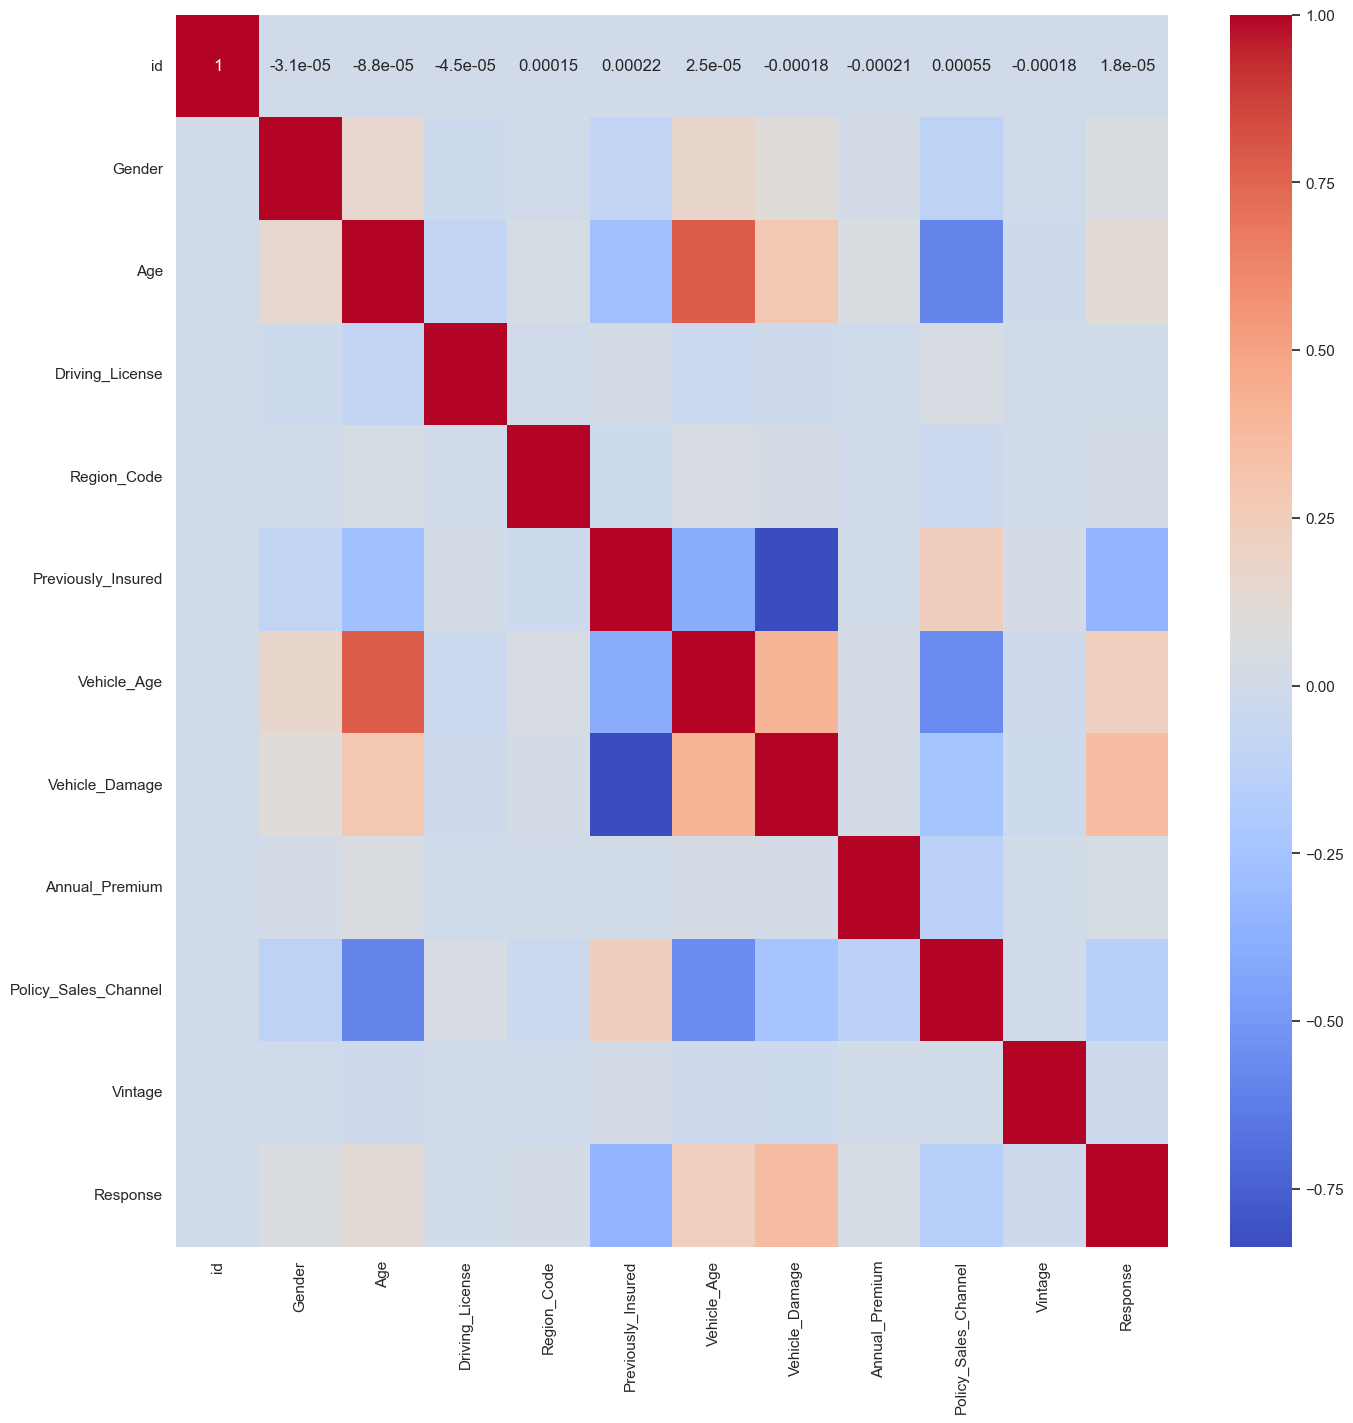

In [18]:
# Build correlation matrix
correlation_matrix = train_df.corr()

# Plot correlation matrix
plt.figure(figsize = (16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# numeric_cols = train_df.select_dtypes(include = np.number)
# col_names = list(numeric_cols.columns)
# col_index = 0
# plt_rows = 4
# plt_cols = 3

# fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (20, 40))
# ax = ax.flatten()

# for i, ax in enumerate(ax):
#     sns.scatterplot(y = train_df[col_names[col_index]], x = train_df.index, data = train_df, c = train_df['Response'], cmap = 'viridis', alpha = 0.5, ax = ax)
#     ax.set_title(f'Subplot {i+1}')
#     col_index += 1

# plt.tight_layout()
# plt.show()

In [20]:
# # Visualising the data
# # Visualising a sample of data to clearly distinguish to see significant variables

# numeric_cols = train_df.select_dtypes(include = np.number)

# genuine_trans = numeric_cols.loc[numeric_cols['Response'] == 0, :]
# fraud_trans = numeric_cols.loc[numeric_cols['Response'] == 1, :]

# genuine_trans_sub = genuine_trans.sample(n=1000, replace = False)

# new_df = pd.concat([fraud_trans, genuine_trans_sub], axis = 0)
# new_df = new_df.sample(frac = 1)
# new_df.reset_index(drop = True, inplace = True)

# column_names = list(numeric_cols.columns)
# column_index = 0

# plot_rows = 4
# plot_cols = 3

# fig, ax = plt.subplots(nrows = plot_rows, ncols = plot_cols, figsize = (20, 40))
# ax = ax.flatten()

# for i, ax in enumerate(ax):
#     sns.scatterplot(y = new_df[column_names[column_index]], x = new_df.index, data = new_df, c = new_df['Response'], cmap = 'RdYlBu', alpha = 0.5, ax = ax)
#     ax.set_title(f'Subplot {i+1}')
#     column_index += 1

# plt.tight_layout()
# plt.show()

In [21]:
# # Checking for outliers using boxplots

# plt.figure(figsize=(20, 40))

# for col in train_df.select_dtypes(include=['number']).columns:
#     plt.subplot(11, 3, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
#     sns.boxplot(x=train_df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

In [22]:
# # Checking for outliers using boxen plots

# plt.figure(figsize=(20, 40))

# for col in train_df.select_dtypes(include=['number']).columns:
#     plt.subplot(11, 3, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
#     sns.boxenplot(x=train_df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

In [23]:
# # Checking for outliers using dist plot

# plt.figure(figsize=(20, 40))

# for col in train_df.select_dtypes(include=['number']).columns:
#     plt.subplot(11, 3, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
#     sns.distplot(x=train_df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

### Checking for data imbalance in categorical column

- After chceking there is mild data imbalance (1 : 7.13)
- We can first build the models without sampling and then iterate after building one

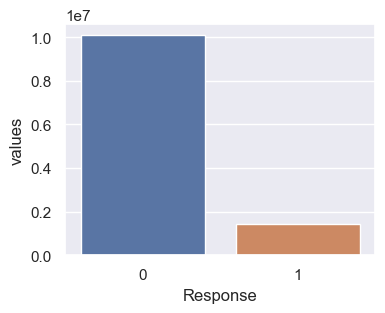

In [24]:
# Checking for data imbalance in training dataframe

temp = train_df['Response'].value_counts()    # Counts the number of ones and zeroes in the column
temp_df = pd.DataFrame({'Response' : temp.index, 'values' : temp.values})    # Creating a data frame with value and their counts
plt.figure(figsize = (4, 3))
sns.barplot(x = 'Response', y = 'values', data = temp_df)
plt.show()

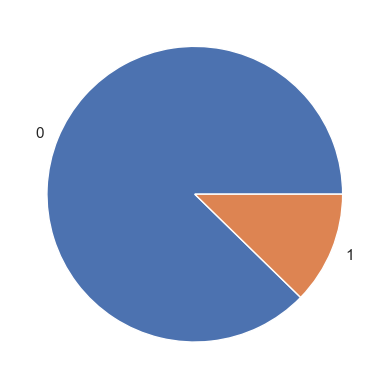

In [25]:
plt.pie(temp_df['values'], labels = [0, 1])
plt.show()

In [26]:
print("Ratio of responded to not responded : ", temp_df.loc[1][1]/temp_df.loc[0][1])

Ratio of responded to not responded :  0.14024733444542023


### Droping the insignificant columns

- Since id is insignificant we can drop that column from both test and train.


In [27]:
train_df = train_df.drop(['id'], axis = 1)
test_df = test_df.drop(['id'], axis = 1)

train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [28]:
test_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,1,51,1,19.0,0,1,0,34115.0,124.0,148


### Train test split of the train df

In [29]:
# Since we have only one data set, spliting it into train and test (validation)

raw_train_df, validation_df = train_test_split(train_df, train_size = 0.75, random_state = 1, stratify = train_df['Response'])
raw_train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
6400262,0,26,1,28.0,0,0,0,54497.0,26.0,234,0
8095698,0,25,1,30.0,1,0,0,38748.0,152.0,131,0
5898936,1,58,1,8.0,1,1,0,2630.0,26.0,142,0
3958879,0,54,1,28.0,0,1,1,46156.0,26.0,24,1
2335270,1,45,1,10.0,0,1,1,2630.0,124.0,257,0


In [30]:
validation_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
6517611,1,44,1,28.0,0,1,1,2630.0,157.0,91,0
1591313,0,23,1,14.0,1,0,0,35345.0,152.0,272,0
7865638,0,26,1,28.0,1,0,0,51860.0,152.0,120,0
10011382,0,23,1,27.0,0,0,1,2630.0,152.0,53,0
8724419,0,38,1,28.0,0,1,1,57844.0,122.0,95,0


In [31]:
raw_train_df.shape

(8628598, 11)

In [32]:
validation_df.shape

(2876200, 11)

In [33]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8628598 entries, 6400262 to 8402201
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int8   
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           int64  
 6   Vehicle_Damage        int8   
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(6), int8(2)
memory usage: 674.8 MB


In [34]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2876200 entries, 6517611 to 326523
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int8   
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           int64  
 6   Vehicle_Damage        int8   
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(6), int8(2)
memory usage: 224.9 MB


In [35]:
raw_train_df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06,8.628598e+06
mean,5.412746e-01,3.838900e+01,9.980113e-01,2.641771e+01,4.630153e-01,6.032037e-01,5.027108e-01,3.046189e+04,1.124161e+02,1.638887e+02,1.229973e-01
std,4.982935e-01,1.499678e+01,4.455088e-02,1.299227e+01,4.986303e-01,5.678678e-01,4.999927e-01,1.644475e+04,5.403797e+01,7.997808e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527900e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182600e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945400e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [36]:
validation_df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06,2.876200e+06
mean,5.415802e-01,3.836725e+01,9.980540e-01,2.642163e+01,4.629403e-01,6.028183e-01,5.025867e-01,3.045983e+04,1.124533e+02,1.639249e+02,1.229974e-01
std,4.982682e-01,1.498347e+01,4.407022e-02,1.298954e+01,4.986248e-01,5.678204e-01,4.999934e-01,1.648470e+04,5.402893e+01,7.998389e+01,3.284342e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527200e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.181700e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.944300e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


### Splitting dependent and independent variable

In [37]:
# Splitting dependent and independent variable

raw_x_train = raw_train_df.drop(['Response'], axis = 1)
raw_y_train = raw_train_df['Response']

raw_x_val = validation_df.drop(['Response'], axis = 1)
raw_y_val = validation_df['Response']

raw_x_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
6400262,0,26,1,28.0,0,0,0,54497.0,26.0,234
8095698,0,25,1,30.0,1,0,0,38748.0,152.0,131
5898936,1,58,1,8.0,1,1,0,2630.0,26.0,142
3958879,0,54,1,28.0,0,1,1,46156.0,26.0,24
2335270,1,45,1,10.0,0,1,1,2630.0,124.0,257


### Model Building on Raw data

In [38]:
# # Building the models on raw data and checking the auc_roc

# # Logistic Regression model
# logit_raw = LogisticRegression()
# logit_raw.fit(raw_x_train, raw_y_train)
# lr_raw_y_pred_train = logit_raw.predict(raw_x_train)
# lr_raw_y_pred_val = logit_raw.predict(raw_x_val)

# print("Auc_roc Score (Logistic Regression - Raw data)")
# logit_train_raw_auc_roc = roc_auc_score(raw_y_train, lr_raw_y_pred_train)
# logit_test_raw_auc_roc = roc_auc_score(raw_y_val, lr_raw_y_pred_val)
# print("Training auc_roc :", logit_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", logit_test_raw_auc_roc)
# print("**************"*7)

# # Ridge Classification (L2 Regularisation)
# ridge_raw = RidgeClassifier(alpha = 1.0)
# ridge_raw.fit(raw_x_train, raw_y_train)
# ridge_raw_y_pred_train = ridge_raw.predict(raw_x_train)
# ridge_raw_y_pred_val = ridge_raw.predict(raw_x_val)

# print("Auc_roc Score (Ridge  Classification model - Raw data)")
# ridge_train_raw_auc_roc = roc_auc_score(raw_y_train, ridge_raw_y_pred_train)
# ridge_test_raw_accuarcy = roc_auc_score(raw_y_val, ridge_raw_y_pred_val)
# print("Training auc_roc :", ridge_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", ridge_test_raw_accuarcy)
# print("**************"*7)

# # Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
# dtree_gini_raw = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
# dtree_gini_raw.fit(raw_x_train, raw_y_train)
# dtg_raw_y_pred_train = dtree_gini_raw.predict(raw_x_train)
# dtg_raw_y_pred_val = dtree_gini_raw.predict(raw_x_val)

# print("Auc_roc Score (Decission Tree (Gini Impurity) - Raw data)")
# dtg_train_raw_auc_roc = roc_auc_score(raw_y_train, dtg_raw_y_pred_train)
# dtg_test_raw_auc_roc = roc_auc_score(raw_y_val, dtg_raw_y_pred_val)
# print("Training auc_roc :", dtg_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", dtg_test_raw_auc_roc)
# print("**************"*7)

# # Decission Tree classifier with Information Gain - Max depth chosen after testing different values
# dtree_gain_raw = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9)
# dtree_gain_raw.fit(raw_x_train, raw_y_train)
# dtga_raw_y_pred_train = dtree_gain_raw.predict(raw_x_train)
# dtga_raw_y_pred_val = dtree_gain_raw.predict(raw_x_val)

# print("Auc_roc Score (Decission Tree (Information Gain) - Raw data)")
# dtga_train_raw_auc_roc = roc_auc_score(raw_y_train, dtga_raw_y_pred_train)
# dtga_test_raw_auc_roc = roc_auc_score(raw_y_val, dtga_raw_y_pred_val)
# print("Training auc_roc :", dtga_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", dtga_test_raw_auc_roc)
# print("**************"*7)

# # Bagging Classifier 
# bagging_raw = BaggingClassifier(dtree_gain_raw, max_samples = 100, max_features = 9)
# bagging_raw.fit(raw_x_train, raw_y_train)
# bagging_raw_y_pred_train = bagging_raw.predict(raw_x_train)
# bagging_raw_y_pred_val = bagging_raw.predict(raw_x_val)

# print("Auc_roc Score (Bagging CLassifier - Raw data)")
# bagging_train_raw_auc_roc = roc_auc_score(raw_y_train, bagging_raw_y_pred_train)
# bagging_test_raw_auc_roc = roc_auc_score(raw_y_val, bagging_raw_y_pred_val)
# print("Training auc_roc :", bagging_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", bagging_test_raw_auc_roc)
# print("**************"*7)

# # Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
# rf_gain_raw = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
# rf_gain_raw.fit(raw_x_train, raw_y_train)
# rfga_raw_y_pred_train = rf_gain_raw.predict(raw_x_train)
# rfga_raw_y_pred_val = rf_gain_raw.predict(raw_x_val)

# print("Auc_roc Score (Random Forest CLassifier (Information Gain) - Raw data)")
# rfga_train_raw_auc_roc = roc_auc_score(raw_y_train, rfga_raw_y_pred_train)
# rfga_test_raw_auc_roc = roc_auc_score(raw_y_val, rfga_raw_y_pred_val)
# print("Training auc_roc :", rfga_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", rfga_test_raw_auc_roc)
# print("**************"*7)
 
# # Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
# rf_gini_raw = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
# rf_gini_raw.fit(raw_x_train, raw_y_train)
# rfg_raw_y_pred_train = rf_gini_raw.predict(raw_x_train)
# rfg_raw_y_pred_val = rf_gini_raw.predict(raw_x_val)

# print("Auc_roc Score (Random Forest CLassifier (Gini Impurity) - Raw data)")
# rfg_train_raw_auc_roc = roc_auc_score(raw_y_train, rfg_raw_y_pred_train)
# rfg_test_raw_auc_roc = roc_auc_score(raw_y_val, rfg_raw_y_pred_val)
# print("Training auc_roc :", rfg_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", rfg_test_raw_auc_roc)
# print("**************"*7)

# # Building the Boosting Classifier models
# # Building AdaBoost model
# adbst_raw = AdaBoostClassifier()
# adbst_raw.fit(raw_x_train, raw_y_train)
# adbst_raw_y_pred_train = adbst_raw.predict(raw_x_train)
# adbst_raw_y_pred_val = adbst_raw.predict(raw_x_val)

# print("Auc_roc Score (AdaBoost CLassifier - Raw data)")
# adbst_train_raw_auc_roc = roc_auc_score(raw_y_train, adbst_raw_y_pred_train)
# adbst_test_raw_auc_roc = roc_auc_score(raw_y_val, adbst_raw_y_pred_val)
# print("Training auc_roc :", adbst_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", adbst_test_raw_auc_roc)
# print("**************"*7)

# # Building Gradient Boosting model
# gdbst_raw = GradientBoostingClassifier()
# gdbst_raw.fit(raw_x_train, raw_y_train)
# gdbst_raw_y_pred_train = gdbst_raw.predict(raw_x_train)
# gdbst_raw_y_pred_val = gdbst_raw.predict(raw_x_val)

# print("Auc_roc Score (Gradient Boost CLassifier - Raw data)")
# gdbst_train_raw_auc_roc = roc_auc_score(raw_y_train, gdbst_raw_y_pred_train)
# gdbst_test_raw_auc_roc = roc_auc_score(raw_y_val, gdbst_raw_y_pred_val)
# print("Training auc_roc :", gdbst_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", gdbst_test_raw_auc_roc)
# print("**************"*7)

# # Building Xtra Gradient Boosting model
# xgdbst_raw = XGBClassifier()
# xgdbst_raw.fit(raw_x_train, raw_y_train)
# xgdbst_raw_y_pred_train = xgdbst_raw.predict(raw_x_train)
# xgdbst_raw_y_pred_val = xgdbst_raw.predict(raw_x_val)

# print("Auc_roc Score (XGBoost CLassifier - Raw data)")
# xgdbst_train_raw_auc_roc = roc_auc_score(raw_y_train, xgdbst_raw_y_pred_train)
# xgdbst_test_raw_auc_roc = roc_auc_score(raw_y_val, xgdbst_raw_y_pred_val)
# print("Training auc_roc :", xgdbst_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", xgdbst_test_raw_auc_roc)
# print("**************"*7)

# # Building the SVM Classifier models for different kernels
# # Building SVM model - with linear kernel
# svm_linear_raw = SVC(kernel = 'linear')
# svm_linear_raw.fit(raw_x_train, raw_y_train)
# svml_raw_y_pred_train = svm_linear_raw.predict(raw_x_train)
# svml_raw_y_pred_val = svm_linear_raw.predict(raw_x_val)

# print("Auc_roc Score (SVM Classifier (linear kernel) - Raw data)")
# svml_train_raw_auc_roc = roc_auc_score(raw_y_train, svml_raw_y_pred_train)
# svml_test_raw_auc_roc = roc_auc_score(raw_y_val, svml_raw_y_pred_val)
# print("Training auc_roc :", svml_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", svml_test_raw_auc_roc)
# print("**************"*7)

# # Building SVM model - with sigmoid kernel
# svm_sigmoid_raw = SVC(kernel = 'sigmoid')
# svm_sigmoid_raw.fit(raw_x_train, raw_y_train)
# svmg_raw_y_pred_train = svm_sigmoid_raw.predict(raw_x_train)
# svmg_raw_y_pred_val = svm_sigmoid_raw.predict(raw_x_val)

# print("Auc_roc Score (SVM Classifier (sigmoid kernel) - Raw data)")
# svmg_train_raw_auc_roc = roc_auc_score(raw_y_train, svmg_raw_y_pred_train)
# svmg_test_raw_auc_roc = roc_auc_score(raw_y_val, svmg_raw_y_pred_val)
# print("Training auc_roc :", svmg_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", svmg_test_raw_auc_roc)
# print("**************"*7)

# # Building SVM model - with poly kernel
# svm_poly_raw = SVC(kernel = 'poly')
# svm_poly_raw.fit(raw_x_train, raw_y_train)
# svmp_raw_y_pred_train = svm_poly_raw.predict(raw_x_train)
# svmp_raw_y_pred_val = svm_poly_raw.predict(raw_x_val)

# print("Auc_roc Score (SVM Classifier (poly kernel) - Raw data)")
# svmp_train_raw_auc_roc = roc_auc_score(raw_y_train, svmp_raw_y_pred_train)
# svmp_test_raw_auc_roc = roc_auc_score(raw_y_val, svmp_raw_y_pred_val)
# print("Training auc_roc :", svmp_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", svmp_test_raw_auc_roc)
# print("**************"*7)

# # Building SVM model - with RBF kernel
# svm_rbf_raw = SVC(kernel = 'rbf')
# svm_rbf_raw.fit(raw_x_train, raw_y_train)
# svmr_raw_y_pred_train = svm_rbf_raw.predict(raw_x_train)
# svmr_raw_y_pred_val = svm_rbf_raw.predict(raw_x_val)

# print("Auc_roc Score (SVM Classifier (RBF kernel) - Raw data)")
# svmr_train_raw_auc_roc = roc_auc_score(raw_y_train, svmr_raw_y_pred_train)
# svmr_test_raw_auc_roc = roc_auc_score(raw_y_val, svmr_raw_y_pred_val)
# print("Training auc_roc :", svmr_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", svmr_test_raw_auc_roc)
# print("**************"*7)

In [39]:
# Function to find the best value of K based on mean squared error

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []    # Finding the error rate for 50 iterations

    for i in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors = i)    # Building the model with i neighbors
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    
# Ploting the error values to find the best value of k
    
    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Error")
    plt.show()

In [40]:
find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

KeyboardInterrupt: 

In [ ]:
# # Building KNN model
# knn_raw = KNeighborsClassifier(n_neighbors = 10)
# knn_raw.fit(raw_x_train, raw_y_train)
# knn_raw_y_pred_train = knn_raw.predict(raw_x_train)
# knn_raw_y_pred_val = knn_raw.predict(raw_x_val)

# print("Auc_roc Score (KNN Classifier (k = 10) - Raw data)")
# knn_train_raw_auc_roc = roc_auc_score(raw_y_train, knn_raw_y_pred_train)
# knn_test_raw_auc_roc = roc_auc_score(raw_y_val, knn_raw_y_pred_val)
# print("Training auc_roc :", knn_train_raw_auc_roc)
# print("**************")
# print("Test auc_roc :", knn_test_raw_auc_roc)
# print("**************"*7)

In [ ]:
# Function for checking the best model out of the tested models for correlation treated dataset

def check_scores(train_auc_roc_list, test_auc_roc_list, data):
    models_list = ['Logistic Regression', 'Ridge Classification', "Decission Tree Classification - Gini Impurity", 
                   "Decission Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
                   'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
                   'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
                   'SVR - RBF']

    auc_roc = pd.DataFrame({'Method' : models_list, 'Auc_roc Score(Training)' : train_auc_roc_list, 
                             'Auc_roc Score(Testing)' : test_auc_roc_list})

    sns.lineplot(x = 'Method', y = 'Auc_roc Score(Training)', data = auc_roc, label = 'Train Auc_roc', color = 'blue', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'blue')
    sns.lineplot(x = 'Method', y = 'Auc_roc Score(Testing)', data = auc_roc, label = 'Test Auc_roc', color = 'green', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'green')
    plt.xticks(rotation = 90)
    plt.title("Auc_roc on %s dataset" % data)
    plt.ylim(0.0, 1.0)
    plt.axhline(y = 0.7, linewidth = 1, color = 'red')
    plt.show()

In [ ]:
# raw_train_auc_roc_list = [logit_train_raw_auc_roc, ridge_train_raw_auc_roc, dtg_train_raw_auc_roc, 
#                            dtga_train_raw_auc_roc, bagging_train_raw_auc_roc, rfg_train_raw_auc_roc, 
#                            rfga_train_raw_auc_roc, adbst_train_raw_auc_roc, gdbst_train_raw_auc_roc, 
#                            xgdbst_train_raw_auc_roc, knn_train_raw_auc_roc, svml_train_raw_auc_roc, 
#                            svmg_train_raw_auc_roc, svmp_train_raw_auc_roc, svmr_train_raw_auc_roc]

# raw_test_auc_roc_list = [logit_test_raw_auc_roc, ridge_test_raw_accuarcy, dtg_test_raw_auc_roc, 
#                           dtga_test_raw_auc_roc, bagging_test_raw_auc_roc, rfg_test_raw_auc_roc, 
#                           rfga_test_raw_auc_roc, adbst_test_raw_auc_roc, gdbst_test_raw_auc_roc, 
#                           xgdbst_test_raw_auc_roc, knn_test_raw_auc_roc, svml_test_raw_auc_roc, 
#                           svmg_test_raw_auc_roc, svmp_test_raw_auc_roc, svmr_test_raw_auc_roc]

# check_scores(raw_train_auc_roc_list, raw_test_auc_roc_list, 'raw')

In [ ]:
def check_scores_bar(train_auc_roc_list, test_auc_roc_list, data):
    models_list = ['Logistic Regression', 'Ridge Classification', "Decision Tree Classification - Gini Impurity", 
                   "Decision Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
                   'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
                   'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
                   'SVR - RBF']

    auc_roc = pd.DataFrame({'Method': models_list, 'Auc_roc Score(Training)': train_auc_roc_list, 
                             'Auc_roc Score(Testing)': test_auc_roc_list})

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Method', y='Auc_roc Score(Training)', data=auc_roc, color= 'blue', label='Train Auc_roc')
    sns.barplot(x='Method', y='Auc_roc Score(Testing)', data=auc_roc, label='Test Auc_roc')
    plt.xticks(rotation=45, ha='right')
    plt.title("Auc_roc on %s dataset" % data)
    plt.ylim(0.0, 1.0)
    plt.axhline(y=0.7, linewidth=1, color='red', linestyle='--')
    plt.legend()
    plt.show()


In [ ]:
# check_scores_bar(raw_train_auc_roc_list, raw_test_auc_roc_list, 'raw')

In [ ]:
def check_scores_both(train_auc_roc_list, test_auc_roc_list, data):
    models_list = ['Logistic Regression', 'Ridge Classification', "Decision Tree Classification - Gini Impurity", 
                   "Decision Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
                   'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
                   'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
                   'SVR - RBF']

    auc_roc = pd.DataFrame({'Method': models_list, 'Auc_roc Score(Training)': train_auc_roc_list, 
                             'Auc_roc Score(Testing)': test_auc_roc_list})

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Method', y='Auc_roc Score(Training)', data=auc_roc, color= 'blue', label='Train Auc_roc')
    sns.barplot(x='Method', y='Auc_roc Score(Testing)', data=auc_roc, color= 'skyblue', label='Test Auc_roc')
    sns.lineplot(x = 'Method', y = 'Auc_roc Score(Training)', data = auc_roc, label = 'Train Auc_roc', color = 'brown', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'brown')
    sns.lineplot(x = 'Method', y = 'Auc_roc Score(Testing)', data = auc_roc, label = 'Test Auc_roc', color = 'green', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'green')
    plt.xticks(rotation=45, ha='right')
    plt.title("Auc_roc on %s dataset" % data)
    plt.ylim(0.0, 1.0)
    plt.axhline(y=0.7, linewidth=1, color='red', linestyle='--')
    plt.legend()
    plt.show()


In [ ]:
# check_scores_both(raw_train_auc_roc_list, raw_test_auc_roc_list, 'raw')

### Standardisation of raw data 

In [ ]:
# Using satandardisation technique

ssc = StandardScaler()
scaled_x_train = pd.DataFrame(ssc.fit_transform(raw_x_train))
scaled_y_train = raw_y_train
scaled_x_val = pd.DataFrame(ssc.fit_transform(raw_x_val))
scaled_y_val = raw_y_val

scaled_x_train.head(2)

In [ ]:
scaled_x_val.head(2)

In [ ]:
# Building the models on scalled data and checking the auc_roc

# Logistic Regression model
logit_scaled = LogisticRegression()
logit_scaled.fit(scaled_x_train, scaled_y_train)
lr_scaled_y_pred_train = logit_scaled.predict(scaled_x_train)
lr_scaled_y_pred_val = logit_scaled.predict(scaled_x_val)

print("Auc_roc Score (Logistic Regression - scaled data)")
logit_train_scaled_auc_roc = roc_auc_score(scaled_y_train, lr_scaled_y_pred_train)
logit_test_scaled_auc_roc = roc_auc_score(scaled_y_val, lr_scaled_y_pred_val)
print("Training auc_roc :", logit_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", logit_test_scaled_auc_roc)
print("**************"*7)

# Ridge Classification (L2 Regularisation)
ridge_scaled = RidgeClassifier(alpha = 1.0)
ridge_scaled.fit(scaled_x_train, scaled_y_train)
ridge_scaled_y_pred_train = ridge_scaled.predict(scaled_x_train)
ridge_scaled_y_pred_val = ridge_scaled.predict(scaled_x_val)

print("Auc_roc Score (Ridge  Classification model - scaled data)")
ridge_train_scaled_auc_roc = roc_auc_score(scaled_y_train, ridge_scaled_y_pred_train)
ridge_test_scaled_accuarcy = roc_auc_score(scaled_y_val, ridge_scaled_y_pred_val)
print("Training auc_roc :", ridge_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", ridge_test_scaled_accuarcy)
print("**************"*7)

# Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
dtree_gini_scaled = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree_gini_scaled.fit(scaled_x_train, scaled_y_train)
dtg_scaled_y_pred_train = dtree_gini_scaled.predict(scaled_x_train)
dtg_scaled_y_pred_val = dtree_gini_scaled.predict(scaled_x_val)

print("Auc_roc Score (Decission Tree (Gini Impurity) - scaled data)")
dtg_train_scaled_auc_roc = roc_auc_score(scaled_y_train, dtg_scaled_y_pred_train)
dtg_test_scaled_auc_roc = roc_auc_score(scaled_y_val, dtg_scaled_y_pred_val)
print("Training auc_roc :", dtg_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", dtg_test_scaled_auc_roc)
print("**************"*7)

# Decission Tree classifier with Information Gain - Max depth chosen after testing different values
dtree_gain_scaled = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree_gain_scaled.fit(scaled_x_train, scaled_y_train)
dtga_scaled_y_pred_train = dtree_gain_scaled.predict(scaled_x_train)
dtga_scaled_y_pred_val = dtree_gain_scaled.predict(scaled_x_val)

print("Auc_roc Score (Decission Tree (Information Gain) - scaled data)")
dtga_train_scaled_auc_roc = roc_auc_score(scaled_y_train, dtga_scaled_y_pred_train)
dtga_test_scaled_auc_roc = roc_auc_score(scaled_y_val, dtga_scaled_y_pred_val)
print("Training auc_roc :", dtga_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", dtga_test_scaled_auc_roc)
print("**************"*7)

# Bagging Classifier 
bagging_scaled = BaggingClassifier(max_samples = 100, max_features = 9)
bagging_scaled.fit(scaled_x_train, scaled_y_train)
bagging_scaled_y_pred_train = bagging_scaled.predict(scaled_x_train)
bagging_scaled_y_pred_val = bagging_scaled.predict(scaled_x_val)

print("Auc_roc Score (Bagging CLassifier - scaled data)")
bagging_train_scaled_auc_roc = roc_auc_score(scaled_y_train, bagging_scaled_y_pred_train)
bagging_test_scaled_auc_roc = roc_auc_score(scaled_y_val, bagging_scaled_y_pred_val)
print("Training auc_roc :", bagging_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", bagging_test_scaled_auc_roc)
print("**************"*7)

# Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
rf_gain_scaled = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
rf_gain_scaled.fit(scaled_x_train, scaled_y_train)
rfga_scaled_y_pred_train = rf_gain_scaled.predict(scaled_x_train)
rfga_scaled_y_pred_val = rf_gain_scaled.predict(scaled_x_val)

print("Auc_roc Score (Random Forest CLassifier (Information Gain) - scaled data)")
rfga_train_scaled_auc_roc = roc_auc_score(scaled_y_train, rfga_scaled_y_pred_train)
rfga_test_scaled_auc_roc = roc_auc_score(scaled_y_val, rfga_scaled_y_pred_val)
print("Training auc_roc :", rfga_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", rfga_test_scaled_auc_roc)
print("**************"*7)
 
# Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
rf_gini_scaled = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
rf_gini_scaled.fit(scaled_x_train, scaled_y_train)
rfg_scaled_y_pred_train = rf_gini_scaled.predict(scaled_x_train)
rfg_scaled_y_pred_val = rf_gini_scaled.predict(scaled_x_val)

print("Auc_roc Score (Random Forest CLassifier (Gini Impurity) - scaled data)")
rfg_train_scaled_auc_roc = roc_auc_score(scaled_y_train, rfg_scaled_y_pred_train)
rfg_test_scaled_auc_roc = roc_auc_score(scaled_y_val, rfg_scaled_y_pred_val)
print("Training auc_roc :", rfg_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", rfg_test_scaled_auc_roc)
print("**************"*7)

# Building the Boosting Classifier models
# Building AdaBoost model
adbst_scaled = AdaBoostClassifier()
adbst_scaled.fit(scaled_x_train, scaled_y_train)
adbst_scaled_y_pred_train = adbst_scaled.predict(scaled_x_train)
adbst_scaled_y_pred_val = adbst_scaled.predict(scaled_x_val)

print("Auc_roc Score (AdaBoost CLassifier - scaled data)")
adbst_train_scaled_auc_roc = roc_auc_score(scaled_y_train, adbst_scaled_y_pred_train)
adbst_test_scaled_auc_roc = roc_auc_score(scaled_y_val, adbst_scaled_y_pred_val)
print("Training auc_roc :", adbst_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", adbst_test_scaled_auc_roc)
print("**************"*7)

# Building Gradient Boosting model
gdbst_scaled = GradientBoostingClassifier()
gdbst_scaled.fit(scaled_x_train, scaled_y_train)
gdbst_scaled_y_pred_train = gdbst_scaled.predict(scaled_x_train)
gdbst_scaled_y_pred_val = gdbst_scaled.predict(scaled_x_val)

print("Auc_roc Score (Gradient Boost CLassifier - scaled data)")
gdbst_train_scaled_auc_roc = roc_auc_score(scaled_y_train, gdbst_scaled_y_pred_train)
gdbst_test_scaled_auc_roc = roc_auc_score(scaled_y_val, gdbst_scaled_y_pred_val)
print("Training auc_roc :", gdbst_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", gdbst_test_scaled_auc_roc)
print("**************"*7)

# Building Xtra Gradient Boosting model
xgdbst_scaled = XGBClassifier()
xgdbst_scaled.fit(scaled_x_train, scaled_y_train)
xgdbst_scaled_y_pred_train = xgdbst_scaled.predict(scaled_x_train)
xgdbst_scaled_y_pred_val = xgdbst_scaled.predict(scaled_x_val)

print("Auc_roc Score (XGBoost CLassifier - scaled data)")
xgdbst_train_scaled_auc_roc = roc_auc_score(scaled_y_train, xgdbst_scaled_y_pred_train)
xgdbst_test_scaled_auc_roc = roc_auc_score(scaled_y_val, xgdbst_scaled_y_pred_val)
print("Training auc_roc :", xgdbst_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", xgdbst_test_scaled_auc_roc)
print("**************"*7)

# Building the SVM Classifier models for different kernels
# Building SVM model - with linear kernel
svm_linear_scaled = SVC(kernel = 'linear')
svm_linear_scaled.fit(scaled_x_train, scaled_y_train)
svml_scaled_y_pred_train = svm_linear_scaled.predict(scaled_x_train)
svml_scaled_y_pred_val = svm_linear_scaled.predict(scaled_x_val)

print("Auc_roc Score (SVM Classifier (linear kernel) - scaled data)")
svml_train_scaled_auc_roc = roc_auc_score(scaled_y_train, svml_scaled_y_pred_train)
svml_test_scaled_auc_roc = roc_auc_score(scaled_y_val, svml_scaled_y_pred_val)
print("Training auc_roc :", svml_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", svml_test_scaled_auc_roc)
print("**************"*7)

# Building SVM model - with sigmoid kernel
svm_sigmoid_scaled = SVC(kernel = 'sigmoid')
svm_sigmoid_scaled.fit(scaled_x_train, scaled_y_train)
svmg_scaled_y_pred_train = svm_sigmoid_scaled.predict(scaled_x_train)
svmg_scaled_y_pred_val = svm_sigmoid_scaled.predict(scaled_x_val)

print("Auc_roc Score (SVM Classifier (sigmoid kernel) - scaled data)")
svmg_train_scaled_auc_roc = roc_auc_score(scaled_y_train, svmg_scaled_y_pred_train)
svmg_test_scaled_auc_roc = roc_auc_score(scaled_y_val, svmg_scaled_y_pred_val)
print("Training auc_roc :", svmg_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", svmg_test_scaled_auc_roc)
print("**************"*7)

# Building SVM model - with poly kernel
svm_poly_scaled = SVC(kernel = 'poly')
svm_poly_scaled.fit(scaled_x_train, scaled_y_train)
svmp_scaled_y_pred_train = svm_poly_scaled.predict(scaled_x_train)
svmp_scaled_y_pred_val = svm_poly_scaled.predict(scaled_x_val)

print("Auc_roc Score (SVM Classifier (poly kernel) - scaled data)")
svmp_train_scaled_auc_roc = roc_auc_score(scaled_y_train, svmp_scaled_y_pred_train)
svmp_test_scaled_auc_roc = roc_auc_score(scaled_y_val, svmp_scaled_y_pred_val)
print("Training auc_roc :", svmp_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", svmp_test_scaled_auc_roc)
print("**************"*7)

# Building SVM model - with RBF kernel
svm_rbf_scaled = SVC(kernel = 'rbf')
svm_rbf_scaled.fit(scaled_x_train, scaled_y_train)
svmr_scaled_y_pred_train = svm_rbf_scaled.predict(scaled_x_train)
svmr_scaled_y_pred_val = svm_rbf_scaled.predict(scaled_x_val)

print("Auc_roc Score (SVM Classifier (RBF kernel) - scaled data)")
svmr_train_scaled_auc_roc = roc_auc_score(scaled_y_train, svmr_scaled_y_pred_train)
svmr_test_scaled_auc_roc = roc_auc_score(scaled_y_val, svmr_scaled_y_pred_val)
print("Training auc_roc :", svmr_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", svmr_test_scaled_auc_roc)
print("**************"*7)


In [ ]:
find_k(scaled_x_train, scaled_y_train, scaled_x_val, scaled_y_val)

In [ ]:
# Building KNN model
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(scaled_x_train, scaled_y_train)
knn_scaled_y_pred_train = knn_scaled.predict(scaled_x_train)
knn_scaled_y_pred_val = knn_scaled.predict(scaled_x_val)

print("Auc_roc Score (KNN Classifier (k = 5) - scaled data)")
knn_train_scaled_auc_roc = roc_auc_score(scaled_y_train, knn_scaled_y_pred_train)
knn_test_scaled_auc_roc = roc_auc_score(scaled_y_val, knn_scaled_y_pred_val)
print("Training auc_roc :", knn_train_scaled_auc_roc)
print("**************")
print("Test auc_roc :", knn_test_scaled_auc_roc)
print("**************"*7)

In [ ]:
scaled_train_auc_roc_list = [logit_train_scaled_auc_roc, ridge_train_scaled_auc_roc, dtg_train_scaled_auc_roc, 
                           dtga_train_scaled_auc_roc, bagging_train_scaled_auc_roc, rfg_train_scaled_auc_roc, 
                           rfga_train_scaled_auc_roc, adbst_train_scaled_auc_roc, gdbst_train_scaled_auc_roc, 
                           xgdbst_train_scaled_auc_roc, knn_train_scaled_auc_roc, svml_train_scaled_auc_roc, 
                           svmg_train_scaled_auc_roc, svmp_train_scaled_auc_roc, svmr_train_scaled_auc_roc]

scaled_test_auc_roc_list = [logit_test_scaled_auc_roc, ridge_test_scaled_accuarcy, dtg_test_scaled_auc_roc, 
                          dtga_test_scaled_auc_roc, bagging_test_scaled_auc_roc, rfg_test_scaled_auc_roc, 
                          rfga_test_scaled_auc_roc, adbst_test_scaled_auc_roc, gdbst_test_scaled_auc_roc, 
                          xgdbst_test_scaled_auc_roc, knn_test_scaled_auc_roc, svml_test_scaled_auc_roc, 
                          svmg_test_scaled_auc_roc, svmp_test_scaled_auc_roc, svmr_test_scaled_auc_roc]

check_scores(scaled_train_auc_roc_list, scaled_test_auc_roc_list, 'scaled')